In [152]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [214]:
#Looking into the data
df = pd.read_csv(r"C:\Users\RAJVANSH\Downloads\movies.csv\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [74]:
# CHECKING FOR MISSING DATA
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [192]:
# FILLING MISSING VALUES
df['rating'] = df['rating'].fillna('UR')
df['writer'] = df['writer'].fillna('Unknown')
df['star'] = df['star'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['score'] = df['score'].fillna(0.0)
df['votes'] = df['votes'].fillna(0.0)
df['budget'] = df['budget'].fillna(0.0)
df['gross'] = df['gross'].fillna(0.0)
df['runtime'] = df['runtime'].fillna(0.0)
df['released'] = df['released'].fillna('Unknown')

In [218]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [102]:
# CHECKING THE DATA TYPES OF THE COLUMNS
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [194]:
# CHANGING THE DATA TYPES OF BUDGET AND GROSS TO INT

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [220]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [196]:
df = df.sort_values(by = 'gross', inplace = False, ascending = False)

In [130]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [198]:
# REMOVING ANY DUPLICATE VALUES
df.drop_duplicates(inplace = True)

In [222]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


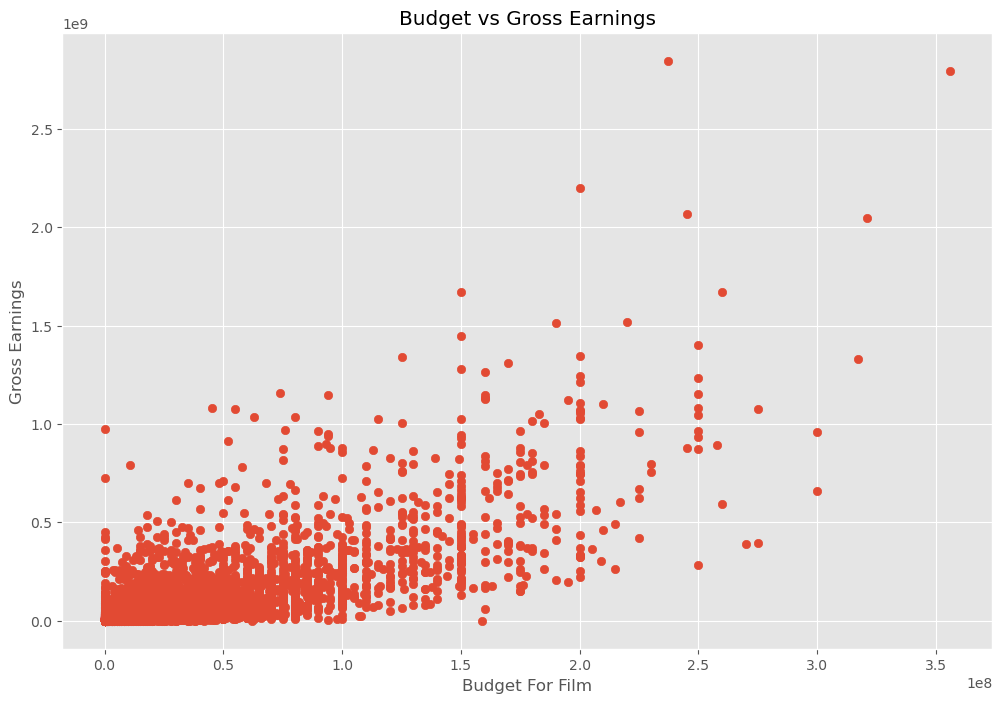

In [140]:
# FINDING THE CORRELATION BETWEEN BUDGET AND GROSS

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

In [142]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


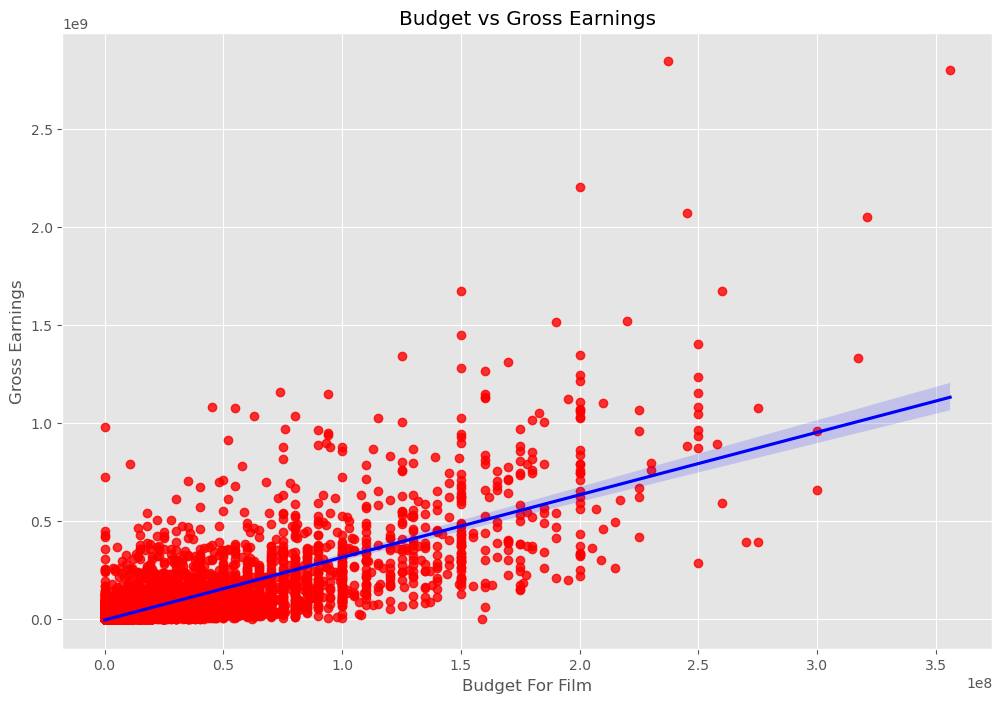

In [162]:
# PLOTING THE SAME USING SEABORN

sns.regplot(x='budget', y ='gross', data= df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

In [ ]:
# FINDING THE OVERALL CORRELATION

In [166]:
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


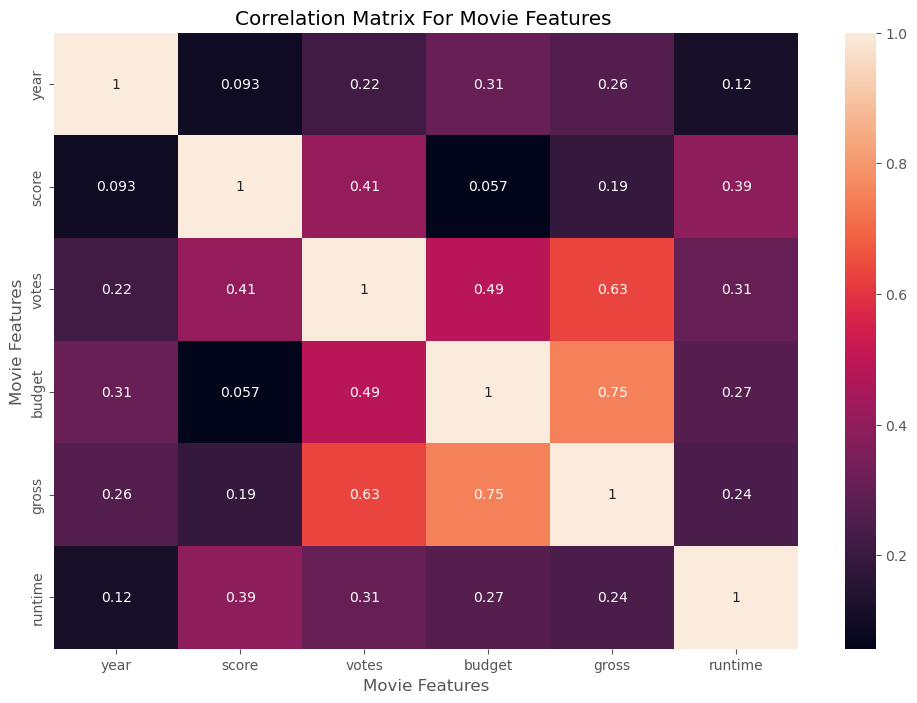

In [178]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True, cbar= True)
plt.title('Correlation Matrix For Movie Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [180]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [216]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [184]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


In [200]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


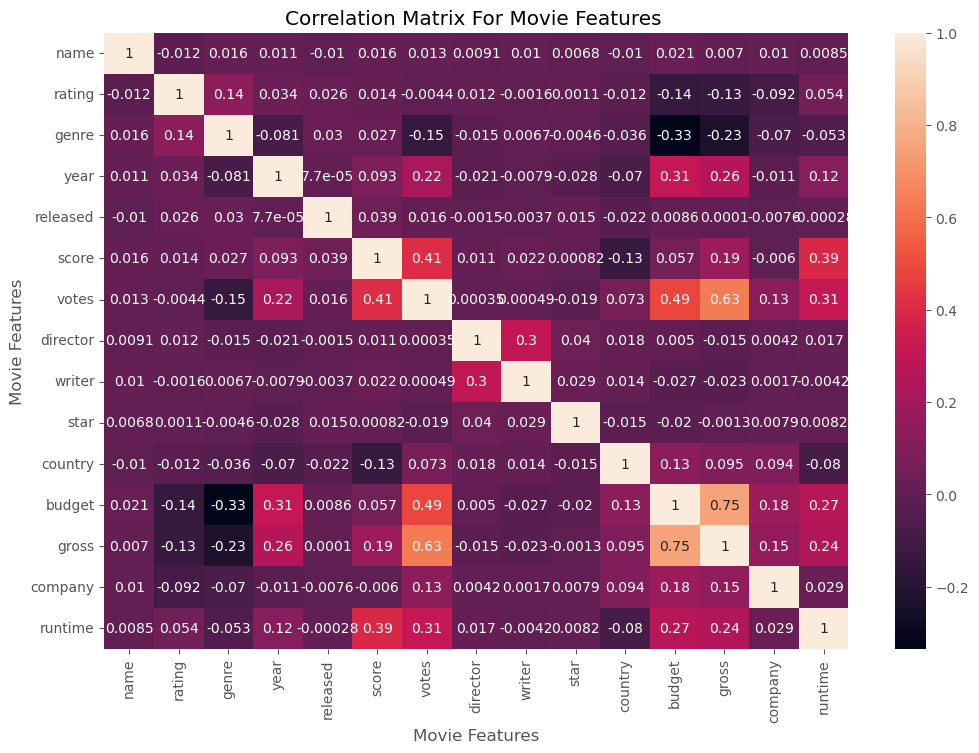

In [202]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True, cbar= True)
plt.title('Correlation Matrix For Movie Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [204]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.013917,-0.004429,0.011951,-0.001610,0.001063,-0.011793,-0.141632,-0.131883,-0.092284,0.054119
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027384,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.092616,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.039182,0.015935,-0.001526,-0.003707,0.015474,-0.021707,0.008552,0.000100,-0.007634,-0.000281
score,0.016377,0.013917,0.027384,0.092616,0.039182,1.000000,0.407101,0.010568,0.022475,0.000823,-0.134439,0.056863,0.186012,-0.005964,0.394564
votes,0.013038,-0.004429,-0.145296,0.222427,0.015935,0.407101,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010568,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.022475,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000823,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216


In [208]:
correlation_mat = df_numerized.corr()
correlation_pairs = correlation_mat.unstack()
correlation_pairs

name      name        1.000000
          rating     -0.012206
          genre       0.016355
          year        0.011453
          released   -0.010480
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009985
          star        0.006844
          country    -0.010359
          budget      0.020548
          gross       0.006989
          company     0.010373
          runtime     0.008483
rating    name       -0.012206
          rating      1.000000
          genre       0.136127
          year        0.033801
          released    0.025526
          score       0.013917
          votes      -0.004429
          director    0.011951
          writer     -0.001610
          star        0.001063
          country    -0.011793
          budget     -0.141632
          gross      -0.131883
          company    -0.092284
          runtime     0.054119
genre     name        0.016355
          rating      0.136127
        

In [210]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
          gross      -0.234297
gross     genre      -0.234297
genre     votes      -0.145296
votes     genre      -0.145296
budget    rating     -0.141632
rating    budget     -0.141632
country   score      -0.134439
score     country    -0.134439
gross     rating     -0.131883
rating    gross      -0.131883
company   rating     -0.092284
rating    company    -0.092284
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.079918
runtime   country    -0.079918
genre     company    -0.070032
company   genre      -0.070032
year      country    -0.069590
country   year       -0.069590
runtime   genre      -0.052914
genre     runtime    -0.052914
country   genre      -0.035783
genre     country    -0.035783
year      star       -0.027912
star      year       -0.027912
writer    budget     -0.026777
budget    writer     -0.026777
gross     writer     -0.022963
writer    gross      -0.022963
country 

In [212]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.632870
votes     gross       0.632870
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#CONCLUSION

# BUDGET AND VOTES HAVE THE HIGHEST CORRELATION WITH GROSS